In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
plt.rcParams.update({'font.size': 12})

In [3]:
iris = load_iris() # загружаем датасет
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.columns = ['sepal length','sepal width','petal length','petal width']

In [6]:
df.head(5)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
X = df.loc[:, ['sepal length','sepal width']].values   # выбираем два столбца для определения кластеров

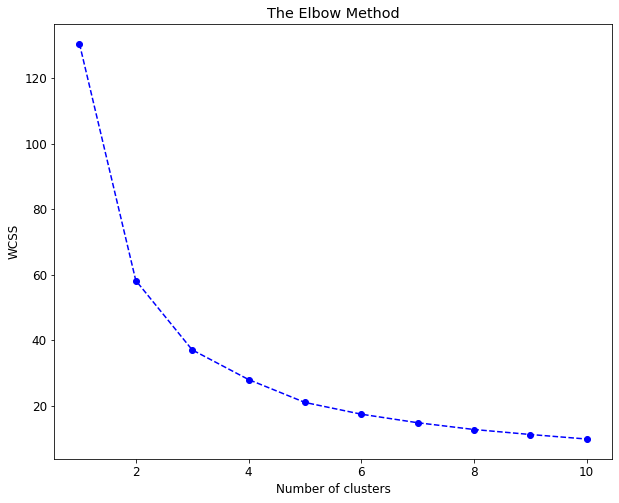

In [56]:
from sklearn.cluster import KMeans   #импорт метода
#строим график для выбора кол-ва кластеров кластеров
wcss = []     
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')  
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, linestyle='--', marker='o', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

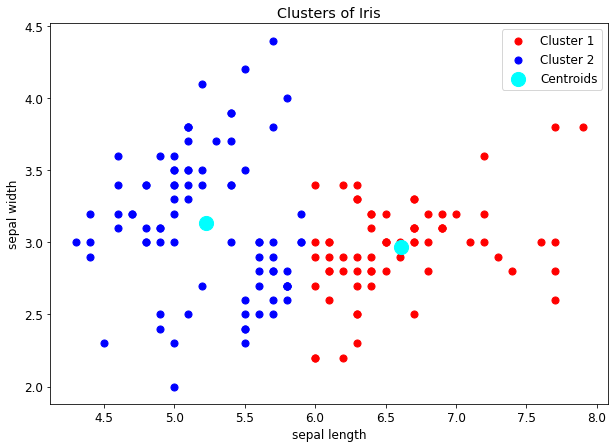

In [59]:
plt.figure(figsize=(10,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'cyan', label = 'Centroids')
plt.title('Clusters of Iris')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [17]:
clusters = pd.Series(kmeans.labels_)

In [18]:
new_df = pd.concat([df,clusters], axis=1)
new_df.columns = ['sepal length','sepal width','petal length','petal width', 'clustr']
new_df['clustr'] = new_df['clustr'].replace([0,1,2],['red','green','blue'])
new_df

,sepal length,sepal width,petal length,petal width,clustr
0,5.1,3.5,1.4,0.2,green
1,4.9,3.0,1.4,0.2,green
2,4.7,3.2,1.3,0.2,green
3,4.6,3.1,1.5,0.2,green
4,5.0,3.6,1.4,0.2,green
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,red
146,6.3,2.5,5.0,1.9,blue
147,6.5,3.0,5.2,2.0,red
148,6.2,3.4,5.4,2.3,red


### LDA MODEL

In [23]:
df_iris = pd.read_csv('iris.csv')
df_iris.set_index('Id').head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [29]:
X , y = df_iris[['SepalLengthCm', 'SepalWidthCm']] , df_iris['Species']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [32]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [33]:
lda.predict(X_test)

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica'], dtype='<U15')

In [42]:
df_iris[df_iris.Id == 130]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
129,130,7.2,3.0,5.8,1.6,Iris-virginica


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7631578947368421

In [35]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,Species,Unnamed 0
16,Iris-setosa,Iris-virginica
130,Iris-virginica,NaN
82,Iris-versicolor,NaN
139,Iris-virginica,NaN
27,Iris-setosa,Iris-setosa
148,Iris-virginica,NaN
45,Iris-setosa,NaN
56,Iris-versicolor,NaN
84,Iris-versicolor,NaN
54,Iris-versicolor,NaN
